<a href="https://colab.research.google.com/github/AnneA95/CIND820/blob/main/CIND820_Test_Train_helpful_v_non_helpful_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving clean_data2.xlsx to clean_data2.xlsx


In [ ]:
df = pd.read_excel("clean_data2.xlsx")
df.head()

,category_id,category_id2,TYPE,TYPE2,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,1,2,GOOD,NOT_HELPFUL,gp:AOqpTOEV727iQ2tWvxT6ip-RsfGrwNL0Z_5droJ1vEu...,Lucas Okie,https://play-lh.googleusercontent.com/a-/AOh14...,most accurate direction,5,0,4.75.0.3,2021-07-07 18:59:29,NaN,NaN
1,2,2,BAD,NOT_HELPFUL,gp:AOqpTOG13v43qeAR1YAqOUj-OL96Bm_BuHoZ3a0OQTy...,Hamim Bhuiyan,https://play-lh.googleusercontent.com/a-/AOh14...,yesterday road time second,1,0,4.57.2.0,2021-06-23 06:23:16,"Hi Hamim, thanks for contacting us. We'd like ...",2021-06-23 17:56:42
2,2,2,BAD,NOT_HELPFUL,gp:AOqpTOE4YSxa9TYa6An6B5-lBU22VxbAdE5zlMcB3GU...,Laura Cartersville,https://play-lh.googleusercontent.com/a/AATXAJ...,great pop ad annoying stuff stop,2,0,NaN,2021-08-25 18:35:42,NaN,NaN
3,2,2,BAD,NOT_HELPFUL,gp:AOqpTOH2PjCJ8qMAQg4ydYg47Wi0XTh9ff_sHQqUL8x...,Nazri Masrom,https://play-lh.googleusercontent.com/a-/AOh14...,terrible update,1,0,4.73.0.3,2021-05-16 00:39:43,NaN,NaN
4,1,1,GOOD,HELPFUL,gp:AOqpTOFFxa4ig_RpqJbDa1qgWLbU401puznwYUE72p5...,Phill Bozz,https://play-lh.googleusercontent.com/a/AATXAJ...,current version much advertising,3,1,4.74.0.3,2021-06-15 01:32:26,NaN,NaN


category id is 1 for good review, 2 for bad review. catgory id2 is 1 for helpful and 2 for not helpful

In [ ]:
df2 = df[['category_id2','TYPE2','content','score','thumbsUpCount']].copy()
df2.head()

,category_id2,TYPE2,content,score,thumbsUpCount
0,2,NOT_HELPFUL,most accurate direction,5,0
1,2,NOT_HELPFUL,yesterday road time second,1,0
2,2,NOT_HELPFUL,great pop ad annoying stuff stop,2,0
3,2,NOT_HELPFUL,terrible update,1,0
4,1,HELPFUL,current version much advertising,3,1


reducing columns so only relevant info present


In [ ]:
pd.DataFrame(df2.TYPE2.unique()).values

array([['NOT_HELPFUL'],
       ['HELPFUL']], dtype=object)

In [ ]:
pd.DataFrame(df2.TYPE2.unique())

,0
0,NOT_HELPFUL
1,HELPFUL


In [ ]:
df2['category_id2'] = df2['TYPE2'].factorize()[0]
category_id_df = df2[['TYPE2', 'category_id2']].drop_duplicates()


# dictionaries to link category id and type
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id2', 'TYPE2']].values)

# New dataframe
df2.head()

,category_id2,TYPE2,content,score,thumbsUpCount
0,0,NOT_HELPFUL,most accurate direction,5,0
1,0,NOT_HELPFUL,yesterday road time second,1,0
2,0,NOT_HELPFUL,great pop ad annoying stuff stop,2,0
3,0,NOT_HELPFUL,terrible update,1,0
4,1,HELPFUL,current version much advertising,3,1


dictionary for the category ID # and helpfulness type


In [ ]:
pip install matplotlib 

In [ ]:
import matplotlib.pyplot as plt

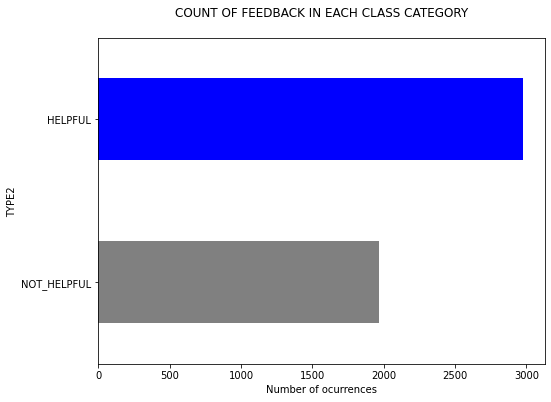

In [ ]:

fig = plt.figure(figsize=(8,6))
colors = ['grey','blue','green','orange']
df2.groupby('TYPE2').content.count().sort_values().plot.barh(
    ylim=0, color=colors, title= 'COUNT OF FEEDBACK IN EACH CLASS CATEGORY\n')
plt.xlabel('Number of ocurrences', fontsize = 10);

seeing the distribution between helpful v non helpful reviews


In [ ]:
df2['content'] = df2['content'].astype(str)
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df2.content).toarray()
labels = df2.category_id2
features.shape

(5000, 2718)

In [ ]:
from scipy.stats import randint
import seaborn as sns # used for plot interactive graph. 
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
import numpy

In [ ]:
import numpy as np

In [ ]:
X = df2['content'] 
y = df2['TYPE2']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 0)

creating test train sets, 25% testing and 75% train

In [ ]:
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

5 cross validation for four models, RF, linear, multi NB, and LR

In [ ]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
LinearSVC,0.6486,0.048315
LogisticRegression,0.6814,0.050387
MultinomialNB,0.6182,0.010616
RandomForestClassifier,0.6028,0.002168


comparing the accuracy and deviation

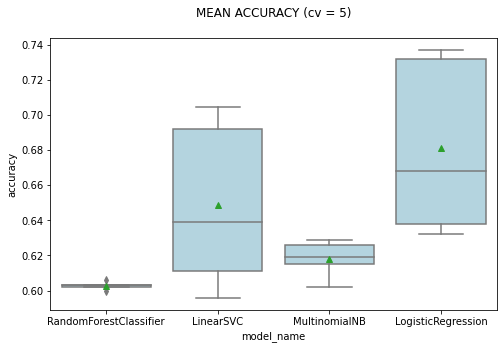

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='model_name', y='accuracy', 
            data=cv_df, 
            color='lightblue', 
            showmeans=True)
plt.title("MEAN ACCURACY (cv = 5)\n", size=12);

visual representation with boxplot

In [ ]:
print(clf.predict(count_vect.transform(["hate"]))) #testing

['BAD']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(df2['content'], df['TYPE'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

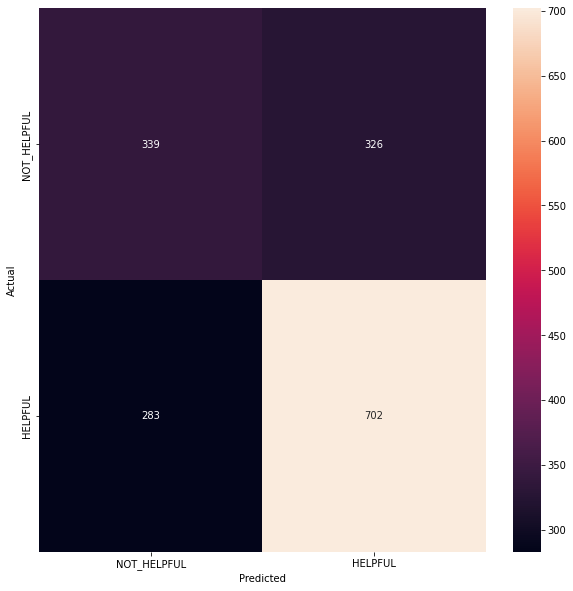

In [ ]:
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.TYPE2.values, yticklabels=category_id_df.TYPE2.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

creating heat graphs to visually show the acutal v predicted accuracy.

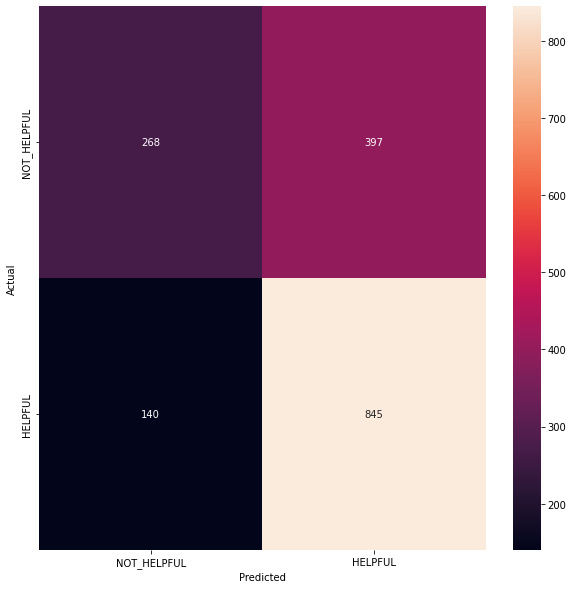

In [ ]:
model = LogisticRegression()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.TYPE2.values, yticklabels=category_id_df.TYPE2.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

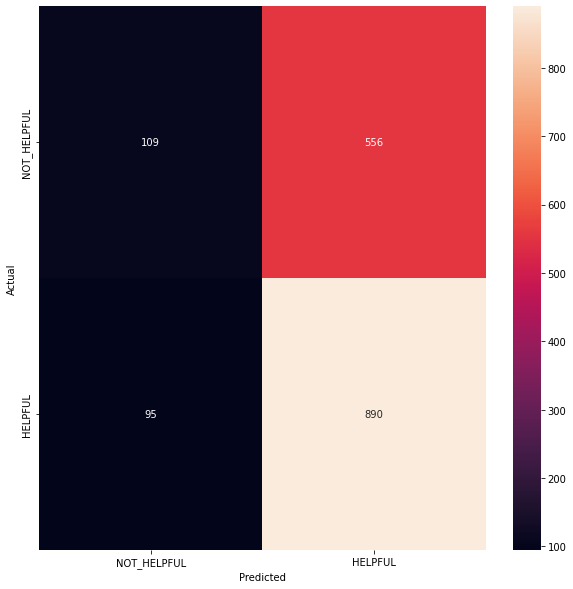

In [ ]:
model = MultinomialNB()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.TYPE2.values, yticklabels=category_id_df.TYPE2.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

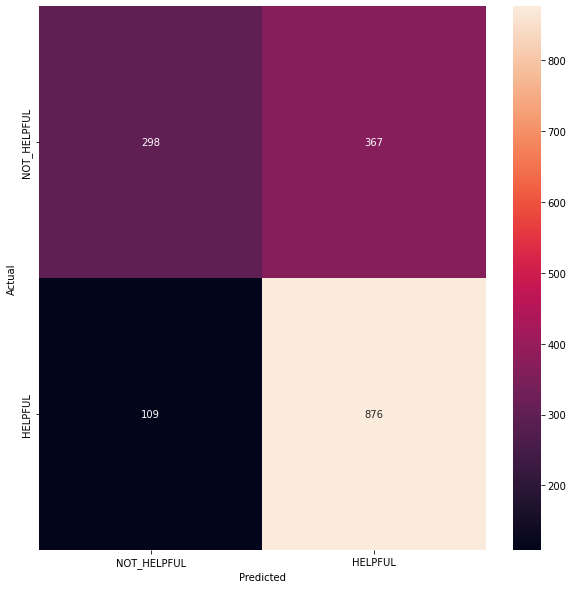

In [ ]:
model = RandomForestClassifier()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.TYPE2.values, yticklabels=category_id_df.TYPE2.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

LR and RF are the best at predicting helpfulness of reviews, even though the accuracy on that is still not very high. LR has the best accuracy

In [ ]:
from IPython.display import display
for predicted in category_id_df.category_id2:
  for actual in category_id_df.category_id2:
    if predicted != actual and conf_mat[actual, predicted] >= 10:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['TYPE2', 'content']])
      print('')


'HELPFUL' predicted as 'NOT_HELPFUL' : 109 examples.


,TYPE2,content
1161,HELPFUL,year numerous reason setting unaware direction...
4268,HELPFUL,good gps favorite favorite
1362,HELPFUL,brilliant account detail dis location problem bad
4523,HELPFUL,good accurate address little user friendly sur...
502,HELPFUL,bus walking route
...,...,...
2586,HELPFUL,excited first direction yard main road opposit...
321,HELPFUL,time travel
261,HELPFUL,horrible voice guidance work half trip route t...
2265,HELPFUL,year back number many address address



'NOT_HELPFUL' predicted as 'HELPFUL' : 367 examples.


,TYPE2,content
398,NOT_HELPFUL,freeze brand new redmi phone android date time...
4836,NOT_HELPFUL,crash mid route traffic avoidance well alterna...
2545,NOT_HELPFUL,old way grab place place way route last time w...
2530,NOT_HELPFUL,cause driving mean sure cop accident hazard co...
906,NOT_HELPFUL,mile regular opportunity advise issue issue
...,...,...
905,NOT_HELPFUL,pro con major con long use voice command enabl...
322,NOT_HELPFUL,instruction divert business unacceptable type ...
421,NOT_HELPFUL,such frustrating use impossible set drive save...
1691,NOT_HELPFUL,downloaded help home hurricane florence many r...


In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df2['TYPE2'].unique()))

              precision    recall  f1-score   support

 NOT_HELPFUL       0.73      0.45      0.56       665
     HELPFUL       0.70      0.89      0.79       985

    accuracy                           0.71      1650
   macro avg       0.72      0.67      0.67      1650
weighted avg       0.72      0.71      0.69      1650

